# Inaugral Project

**Importing relevant packages**

In [1]:
import numpy as np
from scipy import optimize #Optimize
import matplotlib.pyplot as plt #Plotting of figures

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

**Question 1**

The relevant global variables are initially defined. The utility function as well as the budget constraint is then set up. In the budget constraint we impose $c^*=x$ to limit the maximization problem to $l$.

In [2]:
# Defining global variables
m = 1 
v = 10 
eps = 0.3
eps_new = 0.1
tau_0 = 0.4 
tau_1 = 0.1 
kappa = 0.4 
w = 1 # We note w is in fact in the range of 0.5 to 1.5

In [3]:
# Defining (1) and the budget constraint (bc) while substituting x = c*

def utility(c, l, v, eps):
    u = np.log(c) - v*((l**(1+(1/eps)))/(1+(1/eps)))
    return u

def bc(l, m, w, tau_0, tau_1, kappa):
    c = m + w*l - (tau_0*w*l+tau_1*max(w*l-kappa, 0))
    return c

The objective function is set. We note, that in order to maximize utility we require the objective function to return a negative value for utility. This is the case since we optimize with scipy with optimize.minimize_scalar, which attempts to minimize rather than maximize.

In [4]:
# Since this minimizes the utility we minimize the negative ulitity to get the max.

def objective_function(l, w, eps, tau_0, tau_1, kappa, v, m):
    c = bc(l = l, m = m, w = w, tau_0 = tau_0, tau_1 = tau_1, kappa = kappa)
    #returns negative utility to use for optimization
    return -utility(l = l, c = c, eps = eps, v = v)

We call the optimizer and bound $l$ such that $l\in(0,1)$  which yields the optimal labour supply $l^*$. This is used to compute optimal total resources, $x$, which is of course equal to $c$. Finally we calculate the utility $U(c^*,l^*)$.

In [5]:
# Optimizing using scipy
def optimizer(w, eps, v, tau_0, tau_1, kappa, m):
    solve = optimize.minimize_scalar(
        objective_function, method='bounded',
        bounds=(0,1),args=(w, eps, tau_0, tau_1, kappa, v, m))    
# Finding optimizing values and storing of l,c,u
    l_opt = solve.x
    c_opt = bc(m = m, w = w, l = l_opt, tau_0 = tau_0, tau_1 = tau_1, kappa = kappa)
    u_opt = utility(c = c_opt, l = l_opt,  eps = eps, v = v)
    return l_opt, c_opt, u_opt
# storing optima for w=1
l_opt, c_opt, u_opt = optimizer(w = w, eps = eps,v = v,tau_0 = tau_0,tau_1 = tau_1,kappa = kappa, m = m)

# printing results
print(f'The optimal labour supply is {l_opt:.3f}')
print(f'The optimal consumption is {c_opt:.3f}')
print(f'The maximized utility is {u_opt:.3f}')

The optimal labour supply is 0.400
The optimal consumption is 1.240
The maximized utility is 0.172


**Question 2**

We wish to plot labour and conspumption as a function of the wage. We set up a vector of $w$ to loop over between 0.5 and 1.5 and storage for labour and consumption.

In [6]:
# Setting up values of w between 0.5 and 1.5 in the vector, w_vec, and empty storage for labour & cons.
N = 1000
w_vec = np.linspace(0.5, 1.5, N) #define a vector of w from 0.5 to 1,5
l_vec = np.empty(N) #storage for labour
c_vec = np.empty(N) #storage for consumption

Then we loop through the wage rate, finding the optimal level of labour and consumption before plotting these relations in the figure below.

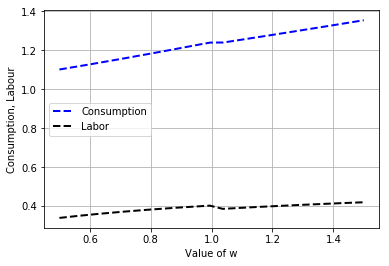

In [7]:
for i, w in enumerate(w_vec):
    bundle = optimizer(w = w, eps = 0.3,v = v,tau_0 = tau_0,tau_1 = tau_1,kappa = kappa,m = m)
    l_vec[i] = bundle[0]
    c_vec[i] = bundle[1]
# Setting up figure using plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,c_vec,ls='--',lw=2,color='blue',label='Consumption')
ax.plot(w_vec,l_vec,ls='--',lw=2,color='black',label='Labor')
ax.set_xlabel('Value of w')
ax.set_ylabel('Consumption, Labour')
ax.grid(True)
ax.legend(loc='center left')

**Question 3**

The wage rate in the population is uniformly distributed between 0.5 and 1.5. We randomly draw 10.000 values of the wage rate and define the total tax. For each wage rate we calculate the tax payment for each individual given the optimal labour supply find through the optimizer. The sum of these individual tax payments yields the total tax revenue.

In [8]:
# Drawing 10.000 random wage rates from a uniform distribution in the interval (0.5, 1.5)
pop_wage_draw = np.random.uniform(0.5,1.5,size=10000)

# Defining the total_tax function and an empty array of 0s with N=10000
def total_tax(pop_wage_draw, eps, v, tau_0, tau_1, kappa, m):
    N=len(pop_wage_draw)
    pop_indi_tax=np.zeros(N)
    
# For each wage rate, return the optimal labour supply calculated through optimizer function
    for i,w in enumerate(pop_wage_draw):
        l_opt_q3=optimizer(w, eps, v, tau_0, tau_1, kappa, m)
        opt_lab_q3=l_opt_q3[0]
        
# Returning tax payment given the optimal labour supply
        pop_indi_tax[i]=tau_0*w*opt_lab_q3+tau_1*max(w*opt_lab_q3-kappa,0)
    
# Taking the sum of all tax payments
    tot1=sum(pop_indi_tax)
    return tot1

# Calling total tax revenue using the array of randomly drawn wages
revenue = total_tax(pop_wage_draw,eps,v,tau_0,tau_1,kappa,m)
# Printing the result
print(f'The total tax revenue is {revenue:.1f}')

The total tax revenue is 1631.2


**Question 4**

An eqvualent procedure to question 3 is carried out, this time imposing a lower Frisch elasticity of labour supply, $\epsilon=0.1$.

In [9]:
pop_wage_draw = np.random.uniform(0.5,1.5,size=10000)

def total_tax(pop_wage_draw, eps_new, v, tau_0, tau_1, kappa, m):
    N=len(pop_wage_draw)
    pop_indi_tax=np.zeros(N)
    
    for i,w in enumerate(pop_wage_draw):
        l_opt_q3=optimizer(w, eps_new, v, tau_0, tau_1, kappa, m)
        opt_lab_q3=l_opt_q3[0]
        
        pop_indi_tax[i]=tau_0*w*opt_lab_q3+tau_1*max(w*opt_lab_q3-kappa,0)
    
    tot2=sum(pop_indi_tax)
    return tot2

revenue_2 = total_tax(pop_wage_draw,eps_new,v,tau_0,tau_1,kappa,m)
# Printing the result
print(f'The total tax revenue is {revenue_2:.1f}')

The total tax revenue is 3196.0


**Question 5**

A new optimizer is defined. This has the purpose of optimizing the tax revenue defined as in question 3 by setting the standard labour income tax, $/tau_0$, the top bracket labour income tax, $\tau_1$, and the cut-off value for the top labour income bracket, $\kappa$. Once more given the structure of optimize.minimize we functionally wish to minimize the negative total tax revenue.

In [10]:
# Defining the tax function to be optimized
def tax_to_be_opt(tax, pop_wage_draw, eps, v, m):
    
    t0 = tax[0]
    t1 = tax[1]
    k = tax[2]
    return -total_tax(pop_wage_draw, eps, v, tau_0, tau_1, kappa, m)

def tax_optimizer(pop_wage_draw, eps, v, m):
    # Given the enormous processing time, the results are plugged in to minimize the processing time
    initial_guess = [0.785, 0.054, 0.531] 
    sol = optimize.minimize(tax_to_be_opt, initial_guess, method='Nelder-Mead', args=(pop_wage_draw, eps, v, m))

    tau_0_opt = sol.x[0]
    tau_1_opt = sol.x[1]
    kappa_opt = sol.x[2]
    
    print(f'The optimal lower tax rate, tau_0, is {tau_0_opt:.3f}')
    print(f'The optimal upper tax rate, tau_1, is {tau_1_opt:.3f}')
    print(f'The optimal cut off for the top income brakcet, kappa, is {kappa_opt:.3f}')
    
    return[tau_0_opt, tau_1_opt, kappa_opt]

tau_0_opt, tau_1_opt, kappa_opt = tax_optimizer(pop_wage_draw, eps, v, m)
Revenue_3 = total_tax(pop_wage_draw, eps, v, tau_0_opt, tau_1_opt, kappa_opt, m)
print(f'The estimated total tax revenue with optimal tau_0, tau_1 and kappa is {Revenue_3:.2f}')

The optimal lower tax rate, tau_0, is 0.785
The optimal upper tax rate, tau_1, is 0.054
The optimal cut off for the top income brakcet, kappa, is 0.531
The estimated total tax revenue with optimal tau_0, tau_1 and kappa is 2465.94


**Conclusion**

Given certain patameter values, tax rates and wage levels the optimal labour supply and consumption is initially computed. By imposing changes within the wage levels, we unsurprisingly conclude both labour supply and consumption to be increasing in wage levels. With given tax rates of $\tau_0 = 0.4$ and $\tau_1 = 0.1$ we find tax revenue to be decreasing in the Frisch elasticity of labour supply, $\epsilon$. Finally, we find that politicians are able to maximize tax revenue, for a given Frisch elasticity of labour supply and distribution of wages, by changing labour income taxes, $\tau_1$ and $\tau_2$ as well as the cut-off value for the top labour income bracket, $\kappa$. Compared to the starting parameter values of $\tau_1$, $\tau_2$ and $\kappa$, we conclude that in order to maximize tax revenue the standard income tax rate should increase and both the top bracket income tax rate and he cut-off value for the top labour income bracket decrease.